## The workbook will be structured as follows:

## 1. Importing libraries and data
## 2. Cleaning, manipulating and reprocessing
## 3. The elbow technique
## 4. Number of clusters
## 5. K-means algorithm 
## 6. Attaching a new column to the dataframe
## 7. Creating different visualizations
## 8. Discussing results
## 9. Calculating descriptive statistics
## 10. Results


### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating a path to the .csv file
path = r'C:\Users\mmoss\07-02-2022 NHL Data Analysis'

In [4]:
# Importing the cleaned data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'data_merged_wins_6.2.csv'), index_col = False)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# Checking the head
df.head()

,Unnamed: 0,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,...,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,number_of_wins,Wins Flag
0,0,2016020045,8468513,4,955,1,0,0,2.0,0,...,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
1,1,2016020045,8476906,4,1396,1,0,4,2.0,0,...,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
2,2,2016020045,8474668,4,915,0,0,1,1.0,0,...,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
3,3,2016020045,8473512,4,1367,3,0,0,0.0,0,...,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
4,4,2016020045,8471762,4,676,0,0,3,2.0,0,...,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins


In [6]:
# Display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [7]:
# Calling it
df.head()

,Unnamed: 0,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,number_of_wins,Wins Flag
0,0,2016020045,8468513,4,955,1,0,0,2.0,0,0,0,0,0,1.0,1.0,0,0,1.0,1,858,97,0,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
1,1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,2,0,0,1.0,2.0,0,0,2.0,0,1177,0,219,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
2,2,2016020045,8474668,4,915,0,0,1,1.0,0,0,0,0,0,2.0,0.0,0,0,0.0,-1,805,0,110,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
3,3,2016020045,8473512,4,1367,3,0,0,0.0,0,2,0,11,27,0.0,0.0,0,0,0.0,-1,1083,19,265,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins
4,4,2016020045,8471762,4,676,0,0,3,2.0,0,0,0,0,0,0.0,1.0,0,0,0.0,-1,613,63,0,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,1735,High Amount of Wins


### 2. cleaning, manipulation and reprocessing

In [39]:
# Removing categorical columns in the data
df_numerical = df.drop(['Unnamed: 0', 'game_id', 'player_id', 'season', 'type', 'date_time_GMT', 'away_team_id', 'home_team_id', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id', 'venue_time_zone_tz', 'Wins Flag'], axis=1)

In [40]:
# Testing it
df_numerical.head()

,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,away_goals,home_goals,venue_time_zone_offset,number_of_wins
0,4,955,1,0,0,2.0,0,0,0,0,0,1.0,1.0,0,0,1.0,1,858,97,0,4,7,-5,1735
1,4,1396,1,0,4,2.0,0,0,2,0,0,1.0,2.0,0,0,2.0,0,1177,0,219,4,7,-5,1735
2,4,915,0,0,1,1.0,0,0,0,0,0,2.0,0.0,0,0,0.0,-1,805,0,110,4,7,-5,1735
3,4,1367,3,0,0,0.0,0,2,0,11,27,0.0,0.0,0,0,0.0,-1,1083,19,265,4,7,-5,1735
4,4,676,0,0,3,2.0,0,0,0,0,0,0.0,1.0,0,0,0.0,-1,613,63,0,4,7,-5,1735


Success!

In [41]:
# Renaming the blocked shots column
df_numerical.rename(columns = {'blocked' : 'Blocked Shots'}, inplace = True)

In [42]:
# Calling it
df_numerical.head()

,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,Blocked Shots,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,away_goals,home_goals,venue_time_zone_offset,number_of_wins
0,4,955,1,0,0,2.0,0,0,0,0,0,1.0,1.0,0,0,1.0,1,858,97,0,4,7,-5,1735
1,4,1396,1,0,4,2.0,0,0,2,0,0,1.0,2.0,0,0,2.0,0,1177,0,219,4,7,-5,1735
2,4,915,0,0,1,1.0,0,0,0,0,0,2.0,0.0,0,0,0.0,-1,805,0,110,4,7,-5,1735
3,4,1367,3,0,0,0.0,0,2,0,11,27,0.0,0.0,0,0,0.0,-1,1083,19,265,4,7,-5,1735
4,4,676,0,0,3,2.0,0,0,0,0,0,0.0,1.0,0,0,0.0,-1,613,63,0,4,7,-5,1735


Success!

Data appears to be standardized.

### 3. The elbow technique

In [43]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [44]:
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-277770459696.4128,
 -173031946623.76886,
 -107445984157.80974,
 -79257783320.67032,
 -67618095398.39521,
 -60160877172.09608,
 -53682274236.32218,
 -48279233533.181816,
 -44967179860.59436]

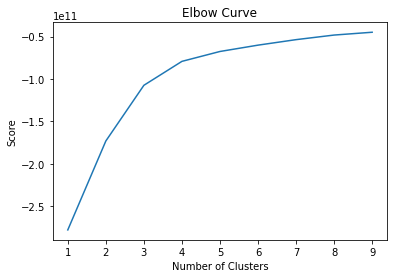

In [45]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Curve starts to flatten out at 4. This is the optimal number of clusters

### 4. Number of clusters

Because the curve rises sharply from 2 to 3 and then slower from 3 to 4 I will choose 4 as the number of clusters because this is where the graph begins to flatten out. 

### 5. K-means algorithm 

In [46]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 


In [47]:
# Fit the k-means object to the data.

kmeans.fit(df_numerical)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

### 6. Attaching a new column to the dataframe

In [48]:
# Assigning new column to the dataframe
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [49]:
# Calling it
df_numerical.head()

,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,Blocked Shots,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,away_goals,home_goals,venue_time_zone_offset,number_of_wins,clusters
0,4,955,1,0,0,2.0,0,0,0,0,0,1.0,1.0,0,0,1.0,1,858,97,0,4,7,-5,1735,3
1,4,1396,1,0,4,2.0,0,0,2,0,0,1.0,2.0,0,0,2.0,0,1177,0,219,4,7,-5,1735,1
2,4,915,0,0,1,1.0,0,0,0,0,0,2.0,0.0,0,0,0.0,-1,805,0,110,4,7,-5,1735,3
3,4,1367,3,0,0,0.0,0,2,0,11,27,0.0,0.0,0,0,0.0,-1,1083,19,265,4,7,-5,1735,1
4,4,676,0,0,3,2.0,0,0,0,0,0,0.0,1.0,0,0,0.0,-1,613,63,0,4,7,-5,1735,0


In [50]:
df_numerical['clusters'].value_counts()

3    497054
1    300957
0    246497
2     86174
Name: clusters, dtype: int64

### 7. Creating different visualizations

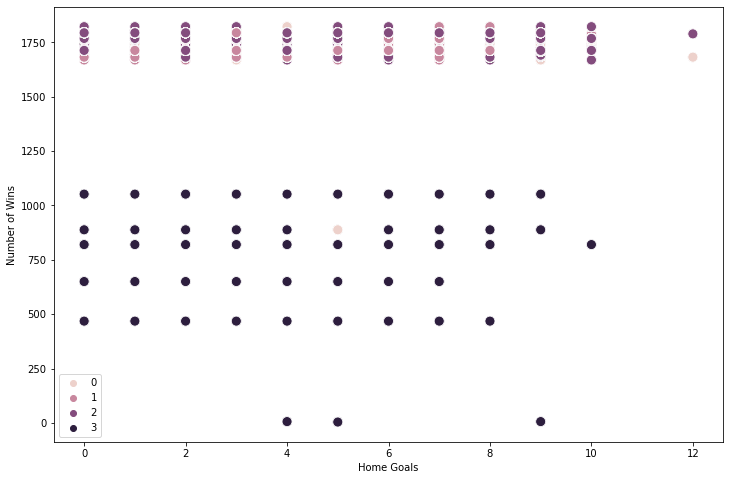

In [31]:
# Plot the clusters for the "home_goals" and "number_of_wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['home_goals'], y=df_numerical['number_of_wins'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Home Goals') # Label x-axis.
plt.ylabel('Number of Wins') # Label y-axis.
plt.show()

### 8. Discussing results

This clustering makes sense and provides more insight into the relationship between Home Goals and Number of Wins. As you can see by the purple dots they make up teams that win less games. As you can see there is only one data point at 10 home goals. Conversely, clusters from 0-3 (light pink to medium purple) have many points at 10 home goals and even two points at 12 home goals. This points to the fact that teams that win more games score more home goals. 

### Creating different visualizations

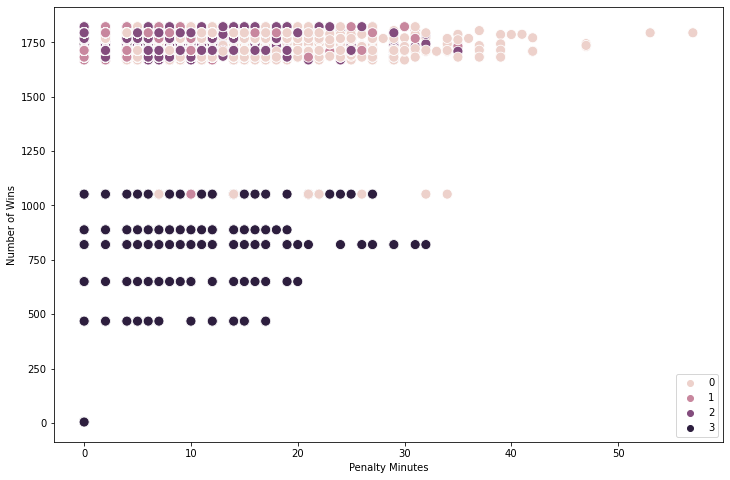

In [32]:
# Plot the clusters for the "penaltyMinutes" and "number_of_wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['penaltyMinutes'], y=df_numerical['number_of_wins'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Penalty Minutes') # Label x-axis.
plt.ylabel('Number of Wins') # Label y-axis.
plt.show()

### Discussing results

This graph has the low number of win teams with the highest amount of penalty minutes at 32 minutes. The other clusters have penalty minutes that go over 50 minutes per game. The majority of the data in these high winning clusters is seen from 0 - 30 minutes. There appears to be no impact of penalty minutes on a teams number of wins. Further exploration of the data may be necessary!

### Creating different visualizations

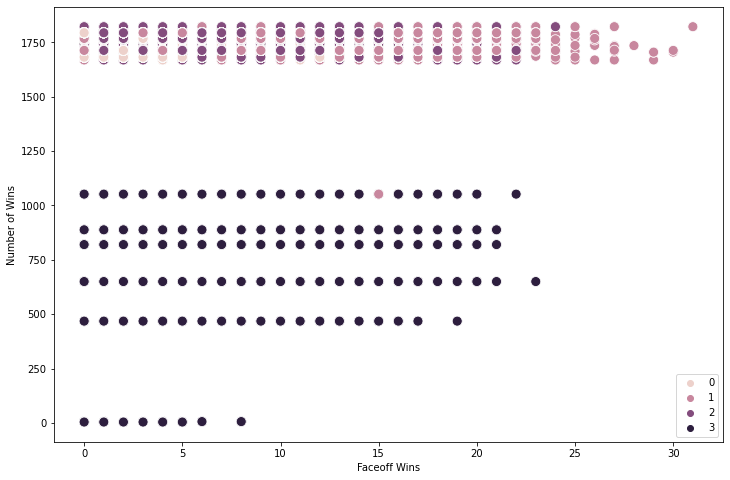

In [33]:
# Plot the clusters for the "faceOffWins" and "number_of_wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['faceOffWins'], y=df_numerical['number_of_wins'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Faceoff Wins') # Label x-axis.
plt.ylabel('Number of Wins') # Label y-axis.
plt.show()

### Discussing results

In the graph above, the dark purple (low amount of win teams) have their highest faceoff wins at 23. Conversely there is quite a number of data points in the pink cluster (higher amount of wins) that have 20-30 faceoff wins. This suggests that the more faceoff wins you have, the better your chance of having more wins for your team.

### 9. Calcuating descriptive statistics

In [27]:
# naming the clusters
df_numerical.loc[df_numerical['clusters'] == 3, 'cluster'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 2, 'cluster'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'cluster'] = 'pink'
df_numerical.loc[df_numerical['clusters'] == 0, 'cluster'] = 'light pink'


In [38]:
# calculating the descriptive statistics
df_numerical.groupby('cluster').agg({'home_goals':['mean', 'median'], 
                                     'number_of_wins':['mean', 'median'], 
                                     'penaltyMinutes':['mean', 'median'],
                                     'faceOffWins':['mean', 'median'],
                                     })

home_goals        number_of_wins         penaltyMinutes         \
                  mean median           mean  median           mean median   
cluster                                                                      
dark purple   3.053389    3.0     785.262164   820.0       0.565683    0.0   
light pink    2.958862    3.0    1736.914692  1736.0       0.831276    0.0   
pink          2.929782    3.0    1739.715745  1736.0       0.512294    0.0   
purple        3.022150    3.0    1740.428967  1736.0       0.557159    0.0   

            faceOffWins         
                   mean median  
cluster                         
dark purple    1.674549    0.0  
light pink     1.095386    0.0  
pink           1.592984    0.0  
purple         1.990645    0.0

In these descriptive statistics, dark purple has a lot less total wins than the other clusters but nothing in the tables highlights why this might be. 

### 10. Results

These results could be useful in the future steps of the analytics pipeline by trying other variables like shots, goals, assists, hits etc vs. number of wins. I am going to try team_id.

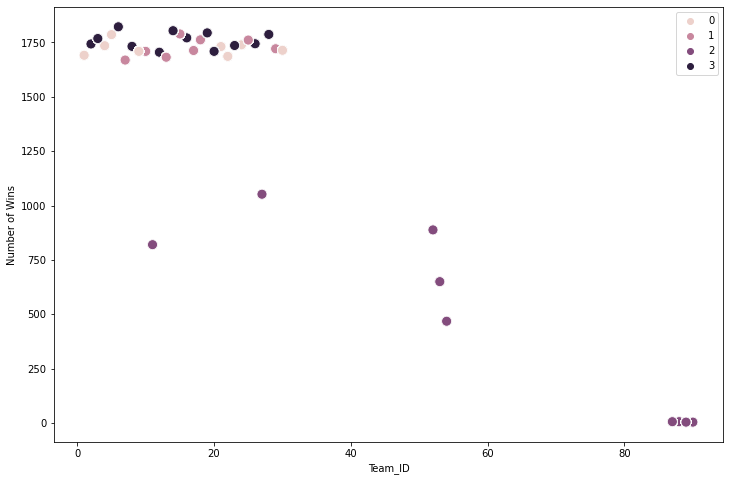

In [52]:
# Plot the clusters for the "team_id" and "number_of_wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['team_id'], y=df_numerical['number_of_wins'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Team_ID') # Label x-axis.
plt.ylabel('Number of Wins') # Label y-axis.
plt.show()

From this graph we can see that this is the answer. Teams that have an ID over 25 have a very few number of wins compared to those from 0 - 25. This may mean that there just isn't enough data for those teams that were added on later. Maybe collecting more data on teams with ID's 25 - 80 would make the data more complete. 